# EDA and Cleaning - Ames Housing Data

This notebook contains all data cleaning and Exploratory Data Analysis performed on Ames Housing Data

## Initial comments from data dictionary review

- "There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). **I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations)** before assigning it to students."

- "... if the purpose is to once again create a common use model to estimate a “typical” sale, it is in the modeler’s best interest to remove any observations that do not seem typical **(such as foreclosures or family sales)**."

### Interesting features:

- Lot Shape
- Land Contour
- Lot Config
- Neighborhood
- Year Built
- Year Remod/Add
- Exter Qual
- Exter Cond
- Overall Qual
- Overall Cond
- Gr Liv Area
- Bedroom
- KitchenQual
- Garage Area
- Garage Qual
- Garage Cond
- Mo Sold
- Yr Sold
- Sale Type
- Sale Condition

In [1]:
# Import the usual suspects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Import data
test = pd.read_csv('../data/test.csv')
train = pd.read_csv('../data/train.csv')

In [15]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [16]:
# Keep only interesting features from reading data description
interesting = [
    'Lot Shape',
    'Land Contour',
    'Lot Config',
    'Neighborhood',
    'Year Built',
    'Year Remod/Add',
    'Exter Qual',
    'Exter Cond',
    'Overall Qual',
    'Overall Cond',
    'Gr Liv Area',
    'Bedroom AbvGr',
    'Kitchen Qual',
    'Garage Area',
    'Garage Qual',
    'Garage Cond',
    'Mo Sold',
    'Yr Sold',
    'Sale Type',
]

In [18]:
train[interesting].dtypes

Lot Shape          object
Land Contour       object
Lot Config         object
Neighborhood       object
Year Built          int64
Year Remod/Add      int64
Exter Qual         object
Exter Cond         object
Overall Qual        int64
Overall Cond        int64
Gr Liv Area         int64
Bedroom AbvGr       int64
Kitchen Qual       object
Garage Area       float64
Garage Qual        object
Garage Cond        object
Mo Sold             int64
Yr Sold             int64
Sale Type          object
dtype: object

In [7]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

<AxesSubplot:xlabel='SalePrice', ylabel='Gr Liv Area'>

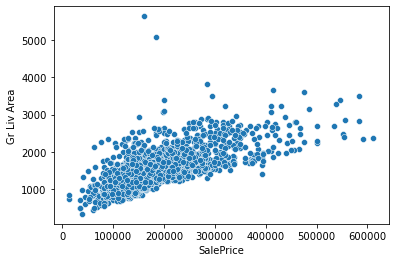

In [12]:
sns.scatterplot(x=train['SalePrice'], y=train['Gr Liv Area'])
;